In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Confidence Intervals Using the Normal Distribution
If we’re working with larger samples (n≥30), we can assume that the sampling distribution of the sample mean is normally distributed (thanks to the Central Limit Theorem) and can instead use the norm.interval() function from the scipy.stats library.

#### 1. Load "tips" dataset from Seaborn library

In [2]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 2. Draw a set of vertical bar plots (based on "total_bill") grouped by "day" variable:

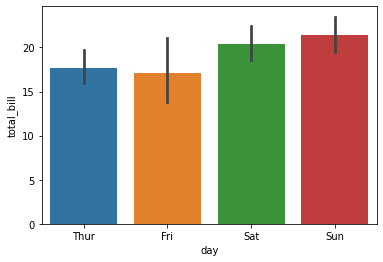

In [3]:
sns.barplot(x='day', y='total_bill', data=tips, ci=95);

#### 3. Subset a dataframe just including Sunday tips

In [4]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [5]:
tipsSun = tips[tips['day'] == 'Sun']
tipsSun.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### 4. Calculate mean and std

In [6]:
tipsSun['total_bill'].agg(['mean', 'std'])

mean    21.410000
std      8.832122
Name: total_bill, dtype: float64

#### 5. Calculate standart error of the mean

In [7]:
sem = tipsSun['total_bill'].std() / np.sqrt(len(tipsSun))

In [8]:
sem

1.0131138555021968

In [9]:
# with df.sem() function

tipsSun['total_bill'].sem()

1.0131138555021968

#### 6. Calculate the margin of error (95%)

In [10]:
z = stats.norm.ppf(0.975)
z

1.959963984540054

In [11]:
moe = z * sem
moe

1.9856666690228222

#### 7. Calculate the upper confidence limit

In [12]:
tipsSun['total_bill'].mean() + moe

23.395666669022823

#### 8. Calculate the lower confidence limit

In [13]:
tipsSun['total_bill'].mean() - moe

19.424333330977177

#### 9. Calculate 95% Confidence Interval around the mean by using scipy.stats

In [14]:
stats.norm.interval(0.95, loc=tipsSun["total_bill"].mean(), scale=sem)

(19.424333330977177, 23.395666669022823)

### Exercise 8.7 (Large Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

- The shopping times of n = 64 randomly selected customers at a local supermarket were recorded. 

- The average and variance of the 64 shopping times were 33 $minutes$ and 256 $minutes^2$, respectively. 

- Estimate μ, the true average shopping time per customer, with a confidence coefficient of 1 − α = .90.

In [15]:
n = 64
xbar = 33
var = 256
cl = 0.90
s = np.sqrt(var)

sem = s/np.sqrt(n)

In [16]:
sem

2.0

In [17]:
stats.norm.interval(0.90, loc=xbar, scale=sem)

(29.710292746097053, 36.28970725390295)

#### Proof

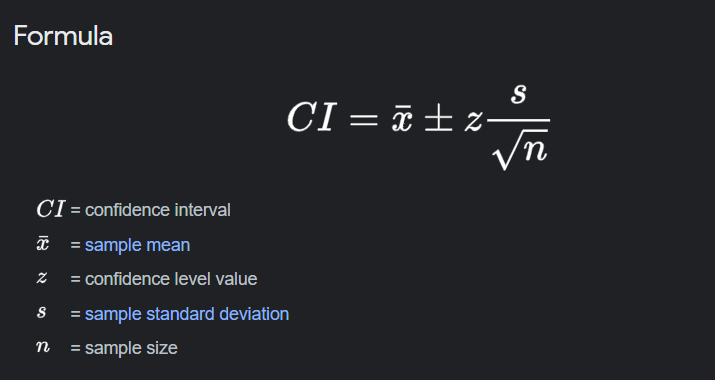

In [18]:
z = stats.norm.ppf(0.95)
z

1.6448536269514722

In [19]:
moe = z * sem
moe

3.2897072539029444

In [20]:
lower_limit = xbar - moe
lower_limit

29.710292746097057

In [21]:
upper_limit = xbar + moe
upper_limit

36.28970725390295

***

### Exercise 8.11 (Small Samples)
*Source: Wackerly, D., Mendenhall, W., & Scheaffer, R. L. (2014). Mathematical statistics with applications. Cengage Learning.*

A manufacturer of gunpowder has developed a new powder, which was tested in eight shells. The resulting muzzle velocities, in feet per second, were as follows:

3005 2925 2935 2965

2995 3005 2937 2905

Find a 95% confidence interval for the true average velocity μ for shells of this type. Assume that muzzle velocities are approximately normally distributed.

In [22]:
x = [3005, 2925, 2935, 2965, 2995, 3005, 2937, 2905]

In [23]:
# Sample size
n = 8

# Sample mean
xbar = np.mean(x)

# Sample standard deviation
s = np.std(x, ddof=1)

# Confidence level
cl = 0.95

In [24]:
stats.t.interval(0.95, df=n-1, loc=xbar, scale=s/np.sqrt(n))

(2926.3202426713874, 2991.6797573286126)

In [25]:
2959 - 32.7

2926.3

#### Proof

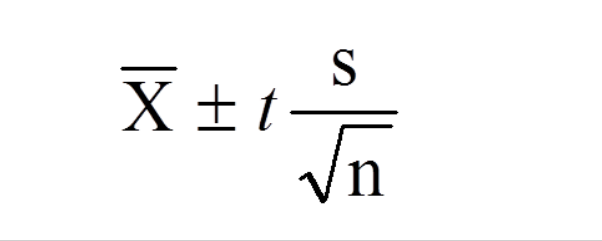

In [26]:
t = stats.t.ppf(0.975, df=n-1)
t

2.3646242510102993

In [27]:
sem = s/np.sqrt(n)
sem

13.820274961085254

In [28]:
moe = t * sem
moe

32.67975732861261

In [29]:
lower_limit = xbar - moe
lower_limit

2926.3202426713874

In [30]:
upper_limit = xbar + moe
upper_limit

2991.6797573286126